#Import modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Public_DataSet/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

5605

In [ ]:
paths[:5]

['/content/drive/MyDrive/Public_DataSet/TESS Toronto emotional speech set data/YAF_angry/YAF_pole_angry.wav',
 '/content/drive/MyDrive/Public_DataSet/TESS Toronto emotional speech set data/YAF_angry/YAF_thought_angry.wav',
 '/content/drive/MyDrive/Public_DataSet/TESS Toronto emotional speech set data/YAF_angry/YAF_peg_angry.wav',
 '/content/drive/MyDrive/Public_DataSet/TESS Toronto emotional speech set data/YAF_angry/YAF_week_angry.wav',
 '/content/drive/MyDrive/Public_DataSet/TESS Toronto emotional speech set data/YAF_angry/YAF_witch_angry.wav']

In [ ]:
labels[:10]

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Public_DataSet/TESS Tor...,angry
1,/content/drive/MyDrive/Public_DataSet/TESS Tor...,angry
2,/content/drive/MyDrive/Public_DataSet/TESS Tor...,angry
3,/content/drive/MyDrive/Public_DataSet/TESS Tor...,angry
4,/content/drive/MyDrive/Public_DataSet/TESS Tor...,angry


In [ ]:
df['label'].value_counts()

angry          800
sad            800
neutral        800
fear           800
happy          800
ps             800
disgust        800
neutral (1)      5
Name: label, dtype: int64

#Exploratory Data Analysis

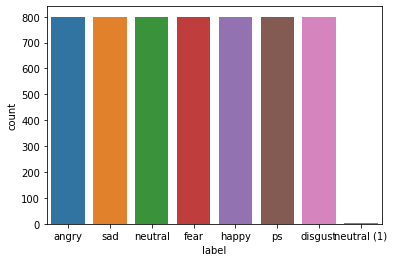

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

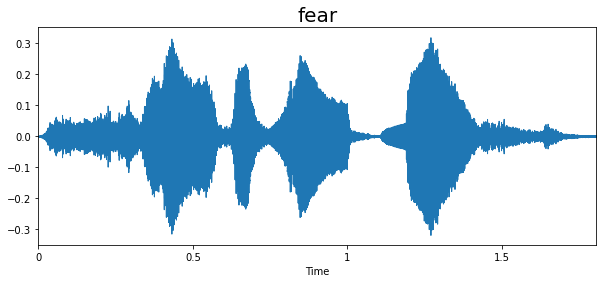

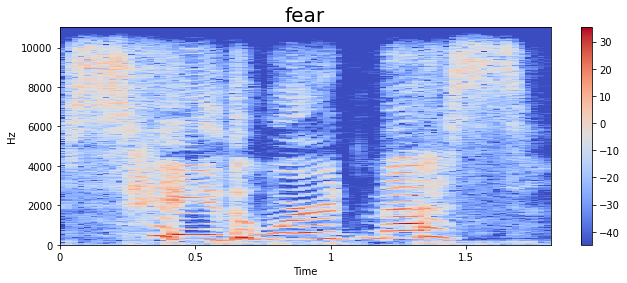

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


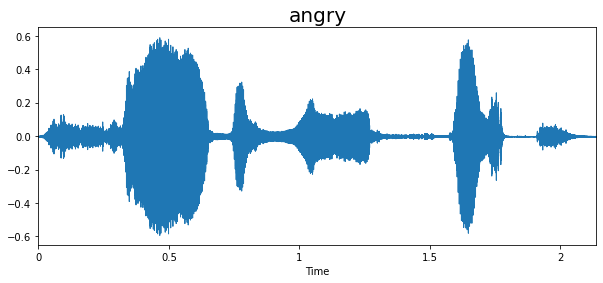

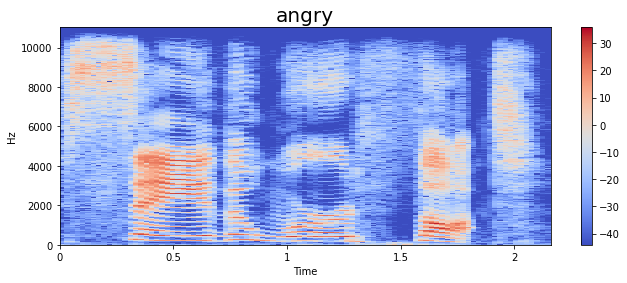

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

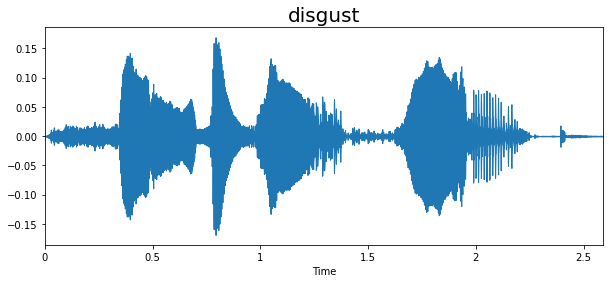

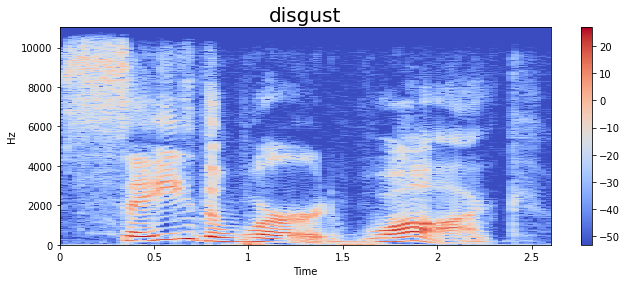

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

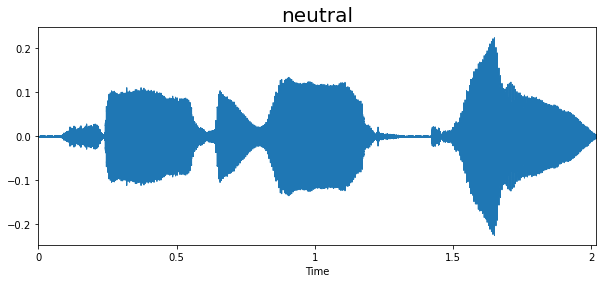

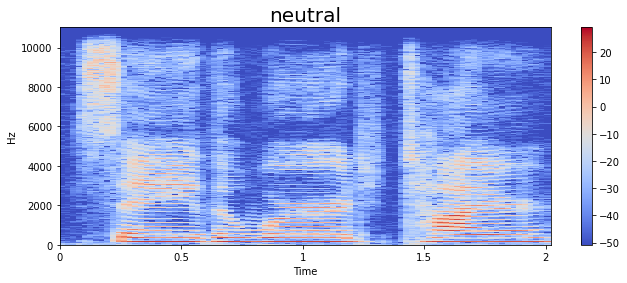

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

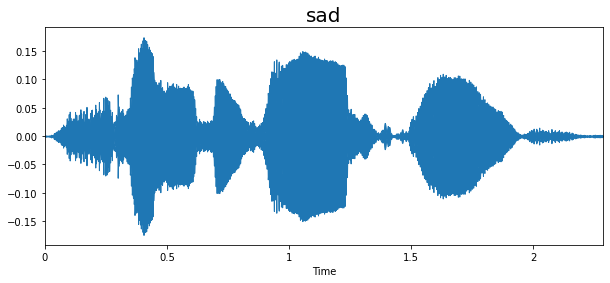

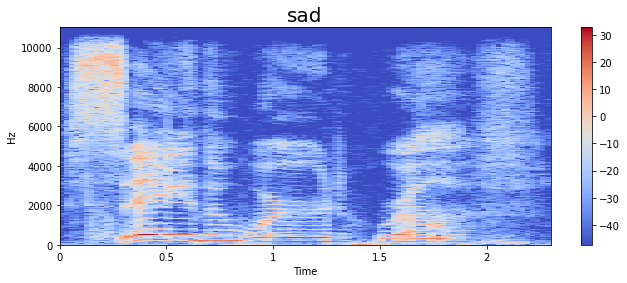

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

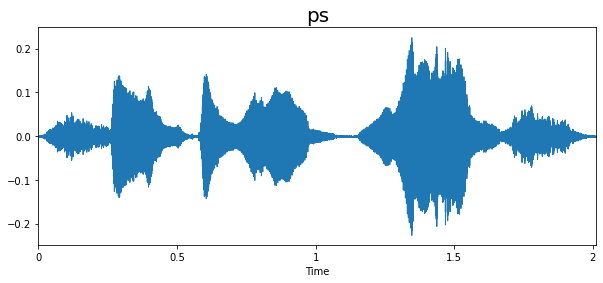

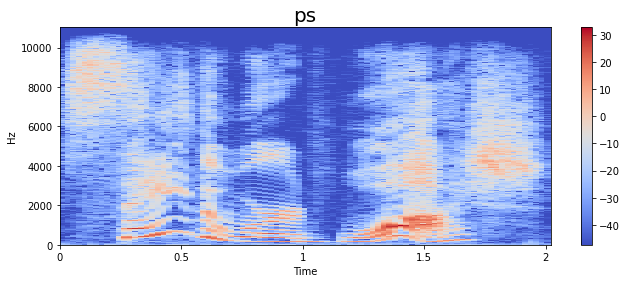

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

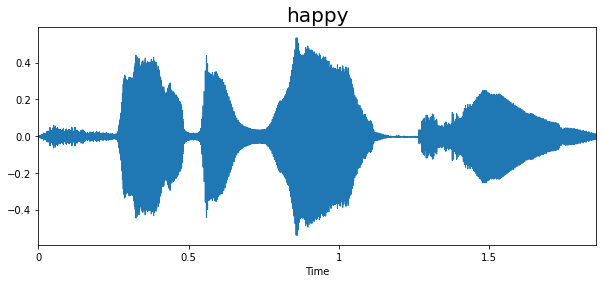

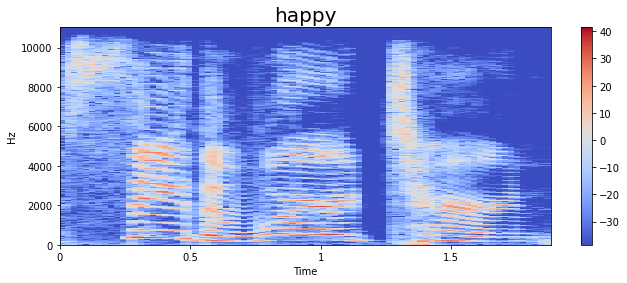

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

#Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
X=extract_mfcc(df['speech'][0])

In [ ]:
X.shape

(40,)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-350.96436, 71.29191, -2.9535675, 9.872868, -...
1       [-336.8431, 33.71284, -3.3019392, 16.549088, -...
2       [-352.65802, 64.15994, -7.319687, 25.075565, -...
3       [-399.10986, 68.07396, 9.579887, 25.916922, -2...
4       [-345.08176, 36.913757, -9.68132, 20.503845, -...
                              ...                        
5600    [-458.10168, 60.600044, 6.730459, -6.0652614, ...
5601    [-500.8915, 75.02085, 22.721863, 10.871353, 9....
5602    [-448.7583, 93.3223, -2.1426954, -15.552248, 1...
5603    [-456.86343, 97.63094, 16.04151, -31.753325, -...
5604    [-413.58853, 88.28754, 5.13419, -18.82048, -3....
Name: speech, Length: 5605, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5605, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5605, 40, 1)

In [ ]:
y=df[['label']]

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y= label_encoder.fit_transform(df['label']) 
  


In [ ]:
y.shape

(5605,)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5605, 1)

#Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50


ValueError: ignored

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

#Plot the results

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()